# Feature Selector - Module Guide

This notebook showcases the usage of the FeatureSelector module.

#### Imports

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#Import packages/modules
from FeatureSelector import FeatureSelector as fs
from FeatureSelector import plot_tools as fs_plot

### Generate Sample

In [2]:
#generate sample for classification modelling
X, y = make_classification(n_samples=5000, n_features=100, n_informative=20, scale=None,
                           weights=[0.6], n_redundant=50, n_repeated=5, n_classes=2,
                           shuffle=True)
df = pd.DataFrame(X, columns=['feature_'+str(ii) for ii in range(X.shape[1])])
df['target'] = y

In [3]:
#separate features and values
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

In [4]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-160.706790,-77.221963,-16.141371,287.636903,-12.791870,-171.158157,70.453001,76.366172,-189.480928,0.165321,...,-127.702440,-8.090877,-129.944694,-74.035592,-122.810173,-89.783773,-69.244540,-187.476931,-22.985473,1
1,13.444183,-552.107621,-13.551270,586.519478,-147.984044,131.719554,66.883125,32.403195,107.396608,-0.017019,...,-140.384225,1.369924,-405.894540,-52.418073,180.699287,436.157138,-72.647034,-231.410408,74.461367,0
2,-26.658872,251.992628,140.683494,-841.767323,35.084764,-166.571472,290.449322,-142.362309,-37.538885,-64.035838,...,-481.831043,18.826331,32.863456,109.251120,241.522710,-260.805071,-99.273184,-323.193429,-33.841469,0
3,-38.479341,256.289850,-4.124930,-114.079889,-91.577677,-104.947964,-93.828767,-143.113247,76.047759,-49.754088,...,-75.996015,-21.866503,23.440072,131.524151,-38.584639,373.302107,0.765649,-54.933357,-9.098564,0
4,-30.575676,-397.099027,85.153858,-413.709085,303.447834,172.355794,69.252548,-142.989538,502.361249,15.517640,...,161.254459,16.495313,-319.688115,107.922613,204.577428,167.607477,41.713360,693.706054,-35.809925,1


## Apply Transformations

In [5]:
#without combining original data
X_data_tf = fs.transformations(X_data)
X_data_tf.head()

,feature_0_YEO_JON,feature_1_YEO_JON,feature_2_YEO_JON,feature_3_YEO_JON,feature_4_YEO_JON,feature_5_YEO_JON,feature_6_YEO_JON,feature_7_YEO_JON,feature_8_YEO_JON,feature_9_YEO_JON,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,-2.139449,-0.173817,-0.344577,0.754233,0.153638,-1.794304,0.341522,0.188417,-0.914532,-0.008899,...,0.287314,-0.265359,-0.421097,-0.398143,-0.300618,-0.611669,-0.382902,-1.198765,-0.593355,-0.323438
1,0.189097,-1.603150,-0.321383,1.450370,-0.570080,1.148584,0.316605,-0.054470,0.202683,-0.013323,...,1.333254,-0.310755,0.080633,-1.586468,-0.186816,0.931398,0.852849,-1.269411,-0.739992,2.752134
2,-0.345556,0.775508,1.180028,-1.778945,0.405206,-1.751839,1.870898,-1.017225,-0.329809,-1.555076,...,1.358313,-1.528010,1.023463,0.292994,0.683304,1.232374,-0.780963,-1.823199,-1.046984,-0.683457
3,-0.503580,0.787716,-0.236386,-0.166993,-0.267594,-1.179939,-0.830962,-1.021358,0.089493,-1.211757,...,0.159889,-0.079998,-1.145728,0.254140,0.804689,-0.169523,0.704786,0.241546,-0.152967,0.134693
4,-0.397911,-1.135338,0.630539,-0.832185,1.799211,1.567448,0.333144,-1.020677,1.617742,0.365180,...,-2.323859,0.799279,0.897132,-1.214607,0.676066,1.049619,0.220466,1.037391,2.158106,-0.748860


In [6]:
#combining with original data
X_data_tf2 = fs.transformations(X_data, combine=True)
X_data_tf2.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,-160.706790,-77.221963,-16.141371,287.636903,-12.791870,-171.158157,70.453001,76.366172,-189.480928,0.165321,...,0.287314,-0.265359,-0.421097,-0.398143,-0.300618,-0.611669,-0.382902,-1.198765,-0.593355,-0.323438
1,13.444183,-552.107621,-13.551270,586.519478,-147.984044,131.719554,66.883125,32.403195,107.396608,-0.017019,...,1.333254,-0.310755,0.080633,-1.586468,-0.186816,0.931398,0.852849,-1.269411,-0.739992,2.752134
2,-26.658872,251.992628,140.683494,-841.767323,35.084764,-166.571472,290.449322,-142.362309,-37.538885,-64.035838,...,1.358313,-1.528010,1.023463,0.292994,0.683304,1.232374,-0.780963,-1.823199,-1.046984,-0.683457
3,-38.479341,256.289850,-4.124930,-114.079889,-91.577677,-104.947964,-93.828767,-143.113247,76.047759,-49.754088,...,0.159889,-0.079998,-1.145728,0.254140,0.804689,-0.169523,0.704786,0.241546,-0.152967,0.134693
4,-30.575676,-397.099027,85.153858,-413.709085,303.447834,172.355794,69.252548,-142.989538,502.361249,15.517640,...,-2.323859,0.799279,0.897132,-1.214607,0.676066,1.049619,0.220466,1.037391,2.158106,-0.748860


## Run Selection Tests

### F-Statistic (ANOVA)

In [7]:
%%time
#run test
results, p_vals = fs.f_test(X_data, y_data, kbest=100, p_vals=True)

Wall time: 7.44 ms


In [8]:
#register results
feature_importance = pd.DataFrame(results.values, index=results.index, columns=['f_test'])
feature_importance_values = pd.DataFrame(p_vals.values, index=p_vals.index, columns=['f_test'])

In [9]:
feature_importance.head()

,f_test
feature_0,1
feature_1,63
feature_2,74
feature_3,86
feature_4,80


In [10]:
feature_importance_values.head()

,f_test
feature_0,0.011273
feature_1,12.503431
feature_2,30.796948
feature_3,37.675890
feature_4,34.415927


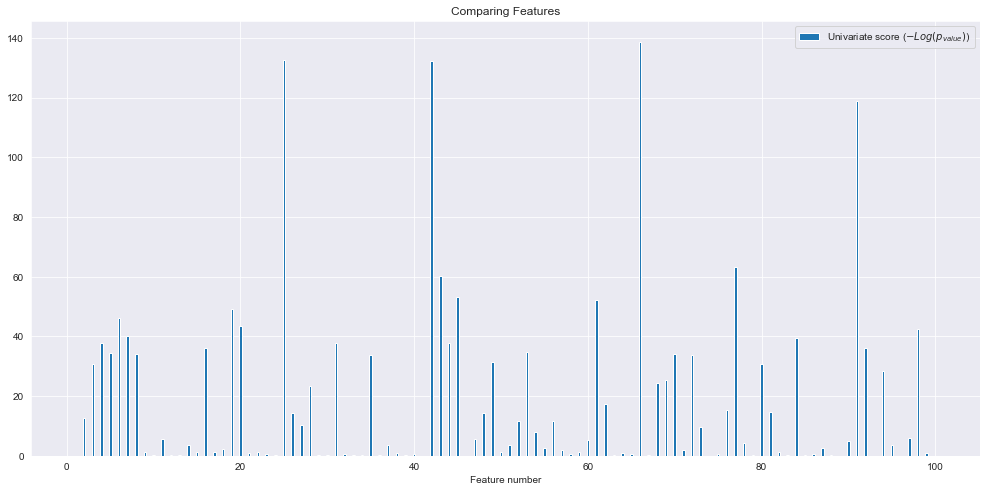

In [11]:
fs_plot.plot_feature_comparison(p_vals, norm=False, label=r'Univariate score ($-Log(p_{value})$)',
                                title='Comparing Features')

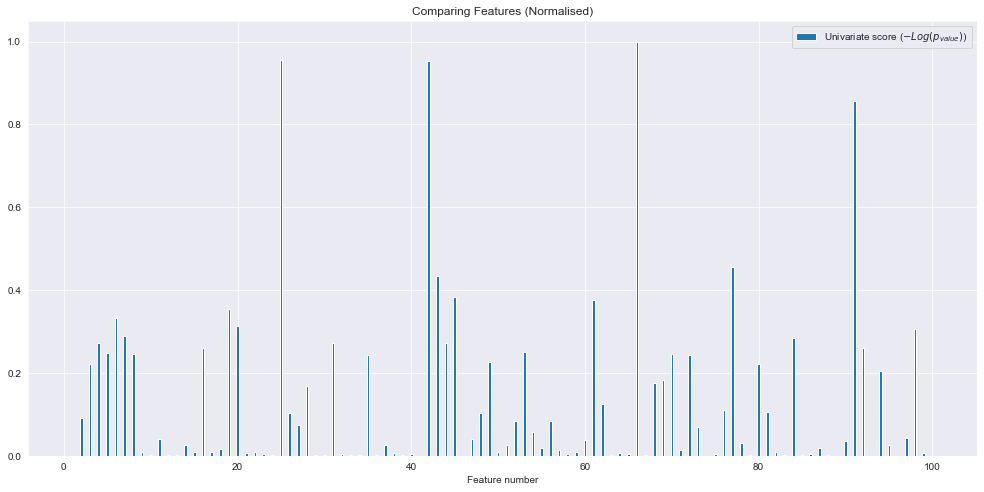

In [12]:
fs_plot.plot_feature_comparison(p_vals, norm=True, label=r'Univariate score ($-Log(p_{value})$)',
                                title='Comparing Features (Normalised)')

### Mutual Information Test

In [13]:
%%time
#run test
results, mi_vals = fs.mitest(X_data, y_data, n_neighbors=5, mi_vals=True)

Wall time: 2.9 s


In [14]:
#register results
feature_importance['mi_test'] = results
feature_importance_values['mi_test'] = mi_vals

In [15]:
feature_importance.head()

,f_test,mi_test
feature_0,1,30
feature_1,63,44
feature_2,74,68
feature_3,86,75
feature_4,80,80


In [16]:
feature_importance_values.head()

,f_test,mi_test
feature_0,0.011273,0.002596
feature_1,12.503431,0.006888
feature_2,30.796948,0.017405
feature_3,37.675890,0.020559
feature_4,34.415927,0.021869


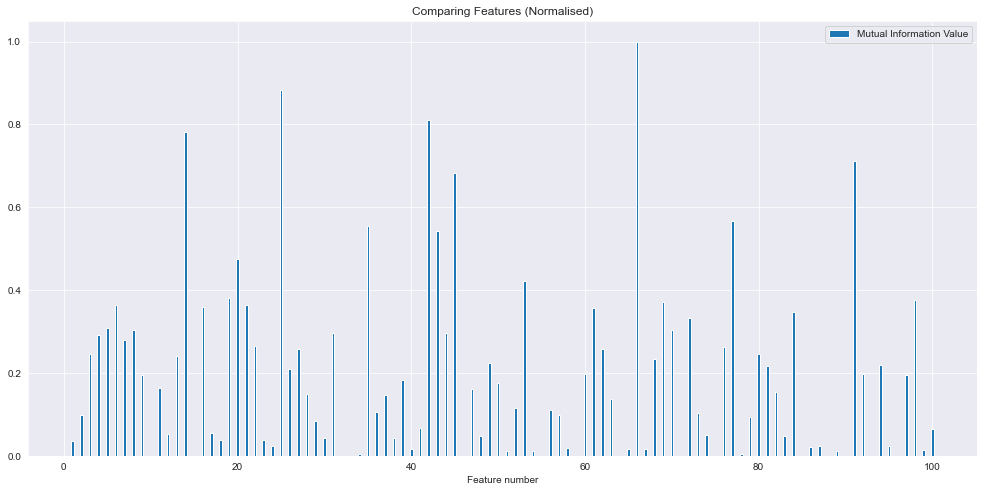

In [17]:
fs_plot.plot_feature_comparison(mi_vals, norm=True, label=r'Mutual Information Value',
                                title='Comparing Features (Normalised)')

### Machine Learning Model - Recursive Factor Elimination

In [18]:
#define model
rf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=4, max_features='sqrt')

In [19]:
%%time
#run test
results, feat_stats, scores = fs.Recursive_Factor_EliminationCV(
    estimator=rf,
    X=X_data,
    y=y_data,
    step=2,
    min_features_to_select=10,
    standardise=False,
    criterion='roc_auc',
    clf_choose='best',
    cv=5,
    n_jobs=4)


Wall time: 2min 10s


In [20]:
#register results
feature_importance['rf_test'] = results
feature_importance_values['rf_test'] = feat_stats.iloc[:, -1]

In [21]:
feature_importance.head()

,f_test,mi_test,rf_test
feature_0,1,30,24
feature_1,63,44,83
feature_2,74,68,59
feature_3,86,75,82
feature_4,80,80,74


In [22]:
feature_importance_values.head()

,f_test,mi_test,rf_test
feature_0,0.011273,0.002596,NaN
feature_1,12.503431,0.006888,NaN
feature_2,30.796948,0.017405,NaN
feature_3,37.675890,0.020559,NaN
feature_4,34.415927,0.021869,NaN


#### Plot Results

- Plotting scores during recursive feature selection process

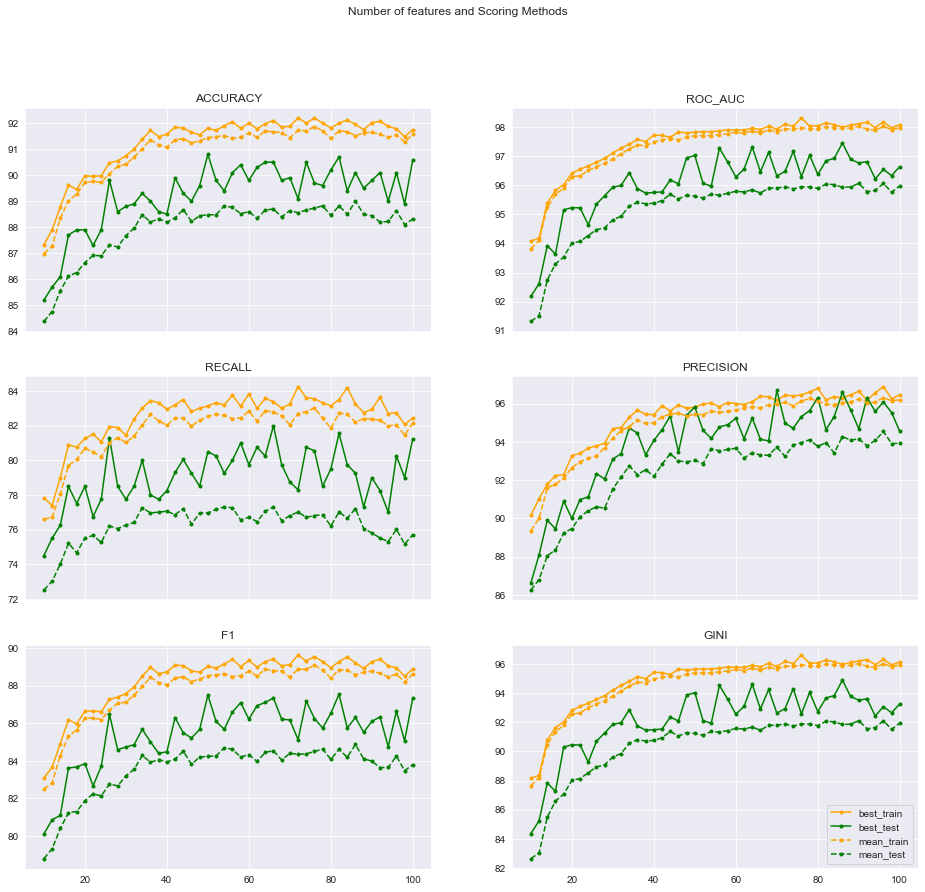

In [23]:
fs_plot.plot_metrics_check(scores)

- Plotting feature importance throughout iterations

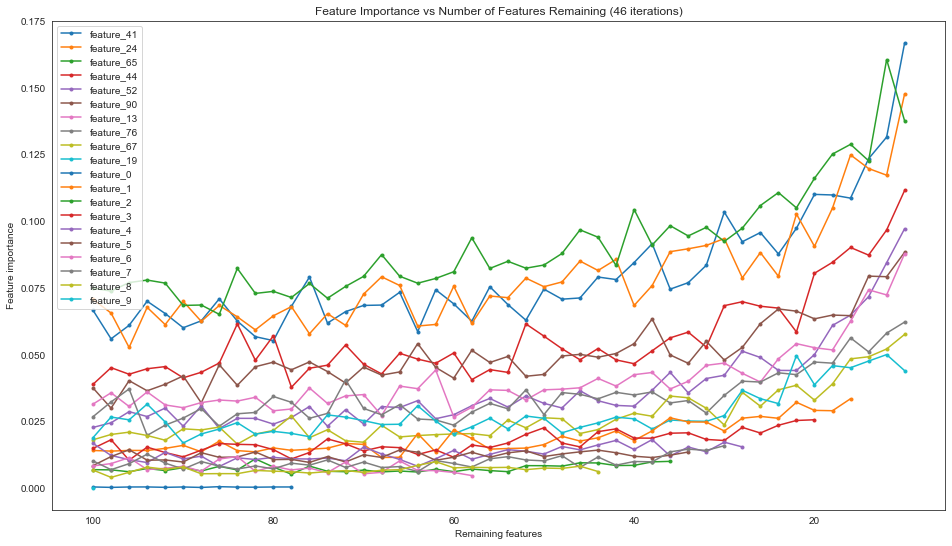

In [24]:
#plot top 20 features
fs_plot.plot_feature_performance(feat_stats, topk=20, legend=True)

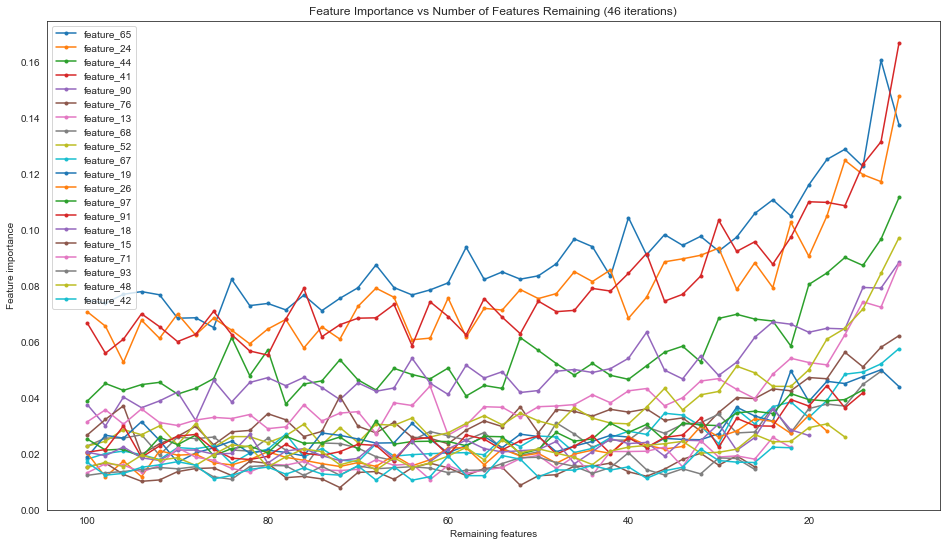

In [25]:
#plot top 20 features on iteration 10 (beginning to end of iterations)
fs_plot.plot_feature_performance(feat_stats, topk=20, iteration=10, legend=True)

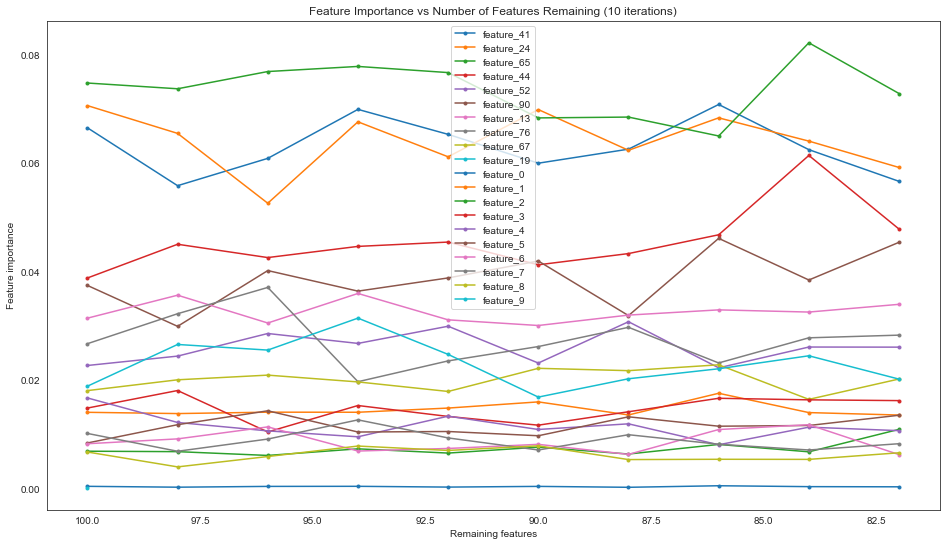

In [26]:
#plot top 20 features from beginning till iteration 10
fs_plot.plot_feature_performance(feat_stats, topk=20, legend=True, to_iteration=10)

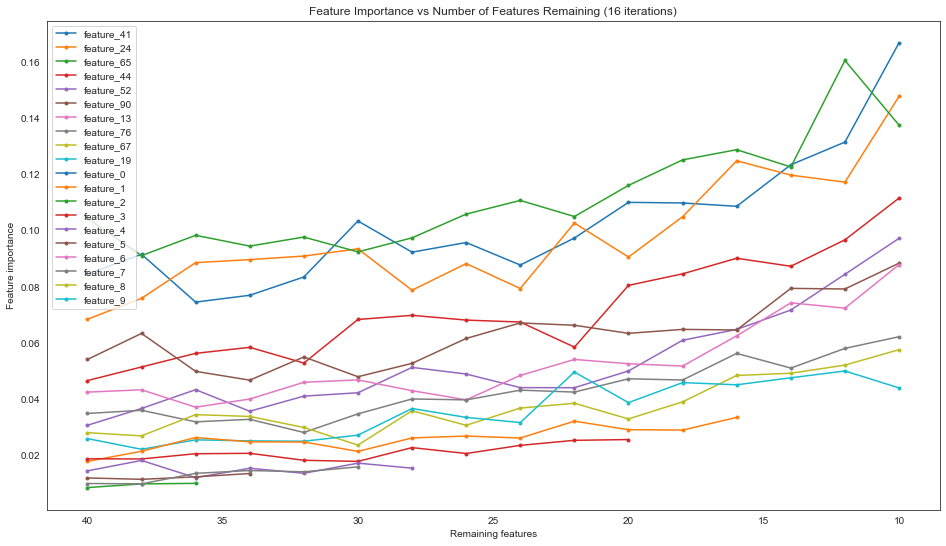

In [27]:
#plot top 20 features from iteration 30 till end
fs_plot.plot_feature_performance(feat_stats, topk=20, legend=True, from_iteration=30)

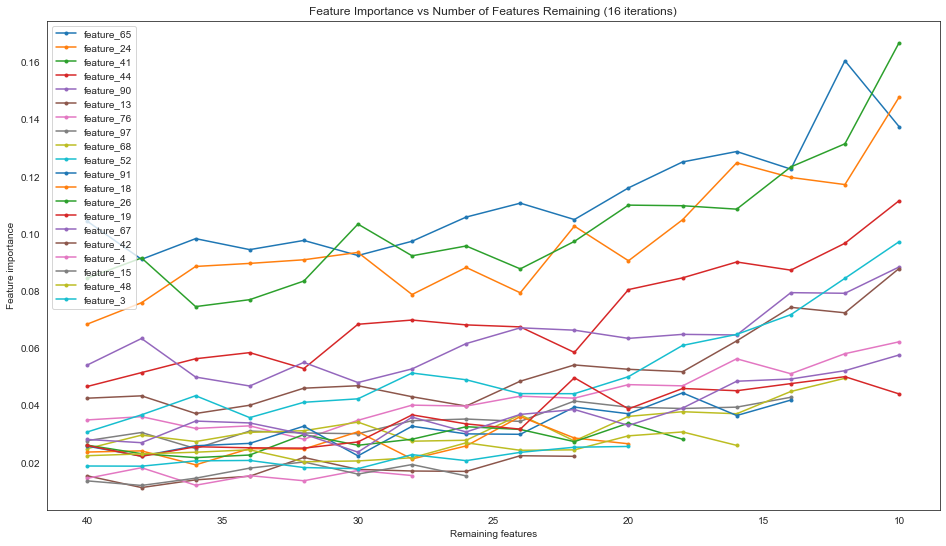

In [28]:
#plot top 20 features on iteration 0(first) from iteration 30 till end
fs_plot.plot_feature_performance(feat_stats, topk=20, legend=True, iteration=0, from_iteration=30)